## Import libraries

In [2]:
# the library versions this code employed is mentioned in comments, if something doesn't work change your package versions
# to these ones, especially sklearn

import pandas as pd # version 0.24.2
import numpy as np #version 1.16.4
import random
import matplotlib.pyplot as plt #matplotlib version 3.1.0
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns #version 0.9.0
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
import sklearn
print(sklearn.__version__) # this code works with sklearn 0.21.2

## Load datasets

In [3]:
# this version of database had 15 features for each channel (in total 10 channel) making 150 features
# for each subject we have 3 seperate databases for 3 rounds
N_Subj = 11 # 11 subjects
df_r1= [0] * N_Subj # dataframe for round1 for all subjects
df_r2= [0] * N_Subj # dataframe for round2 for all subjects
df_r3= [0] * N_Subj # dataframe for round3 for all subjects

# making a column name for dataframe
# the database is organized in the way that first feature of all 10 channels are at the beginning, then the second feature for all channels and so on
cl_names= []
for i in range(1,11):
    cl_names.append('MAV'+str(i))
for i in range(1,11):
    cl_names.append('ZC'+str(i))
for i in range(1,11):
    cl_names.append('SSC'+str(i))
for i in range(1,11):
    cl_names.append('WL'+str(i))
for i in range(1,11):
    cl_names.append('HP_A'+str(i))
for i in range(1,11):
    cl_names.append('HP_M'+str(i))
for i in range(1,11):
    cl_names.append('HP_C'+str(i))
for i in range(1,11):
    cl_names.append('SE'+str(i))
for i in range(1,11):
    cl_names.append('CCI_'+str(i))
for i in range(1,11):
    cl_names.append('CCII_'+str(i))
for i in range(1,11):
    cl_names.append('CCIII_'+str(i))
for i in range(1,11):
    cl_names.append('CCIV_'+str(i))
for i in range(1,11):
    cl_names.append('RMS'+str(i))    
for i in range(1,11):
    cl_names.append('IEMG'+str(i))
for i in range(1,11):
    cl_names.append('SKEW'+str(i))
    
cl_names.append('class') #column dedicated to show which class of movement this sample belongs to
cl_names.append('move') #column dedicated to show which number of movement (out of 40 in each round) this sample belongs to

#loading sepearte databases for each round and subject
for i in range(0,N_Subj):
    df_r1[i] = pd.read_csv('database_v2_sbj'+str(i+1)+'_s1_WL512_S128_r1.csv')
    df_r1[i].columns=cl_names
    
    df_r2[i] = pd.read_csv('database_v2_sbj'+str(i+1)+'_s1_WL512_S128_r2.csv')
    df_r2[i].columns=cl_names
    
    df_r3[i] = pd.read_csv('database_v2_sbj'+str(i+1)+'_s1_WL512_S128_r3.csv')
    df_r3[i].columns=cl_names

print("Subject1")
print("Round1",np.shape(df_r1[0]))
print("Round2",np.shape(df_r2[0]))
print("round3",np.shape(df_r3[0]))

Subject1
Round1 (2755, 152)
Round2 (2880, 152)
round3 (2588, 152)


In [4]:
# print(df_r1[10].dtypes)
df_r1[0].head(10)

MAV1      float64
MAV2      float64
MAV3      float64
MAV4      float64
MAV5      float64
MAV6      float64
MAV7      float64
MAV8      float64
MAV9      float64
MAV10     float64
ZC1         int64
ZC2         int64
ZC3         int64
ZC4         int64
ZC5         int64
ZC6         int64
ZC7         int64
ZC8         int64
ZC9         int64
ZC10        int64
SSC1        int64
SSC2        int64
SSC3        int64
SSC4        int64
SSC5        int64
SSC6        int64
SSC7        int64
SSC8        int64
SSC9        int64
SSC10       int64
           ...   
RMS3      float64
RMS4      float64
RMS5      float64
RMS6      float64
RMS7      float64
RMS8      float64
RMS9      float64
RMS10     float64
IEMG1     float64
IEMG2     float64
IEMG3     float64
IEMG4     float64
IEMG5     float64
IEMG6     float64
IEMG7     float64
IEMG8     float64
IEMG9     float64
IEMG10    float64
SKEW1     float64
SKEW2     float64
SKEW3     float64
SKEW4     float64
SKEW5     float64
SKEW6     float64
SKEW7     

,MAV1,MAV2,MAV3,MAV4,MAV5,MAV6,MAV7,MAV8,MAV9,MAV10,...,SKEW3,SKEW4,SKEW5,SKEW6,SKEW7,SKEW8,SKEW9,SKEW10,class,move
0,0.011440,0.007049,0.007343,0.040629,0.012729,0.017786,0.013964,0.029614,0.022596,0.009105,...,0.318860,0.23952,0.039047,-0.637670,-1.401700,-0.536760,1.109600,0.280630,8,36
1,0.047077,0.034412,0.019688,0.095069,0.094247,0.144480,0.051746,0.060704,0.088419,0.061936,...,-0.070388,0.34692,0.213570,0.512390,-0.089661,-0.120520,0.109120,0.409140,8,5
2,0.032606,0.015454,0.011722,0.041959,0.095004,0.046755,0.033878,0.027089,0.101260,0.035861,...,0.118980,0.20484,0.068442,0.000578,0.327350,-0.110150,-0.027281,0.118570,5,6
3,0.015377,0.020118,0.009892,0.020248,0.051079,0.016831,0.011195,0.016046,0.027189,0.014337,...,-0.047136,0.14082,-0.371070,-0.108130,0.069448,-0.099661,-0.346300,0.237040,6,28
4,0.012313,0.014122,0.019198,0.087738,0.126720,0.032815,0.010385,0.034037,0.224500,0.018224,...,-0.035113,-0.42522,0.069521,0.263290,0.267010,-0.135760,-0.026827,0.323000,2,14
5,0.024255,0.031359,0.013659,0.034794,0.066356,0.018987,0.018291,0.029561,0.038092,0.019897,...,-0.419130,0.50191,-0.670990,0.127950,-0.144300,-0.395270,0.142920,-0.141420,7,20
6,0.007872,0.007103,0.009197,0.042481,0.097330,0.020678,0.008299,0.015294,0.120970,0.014435,...,0.259100,0.10333,0.048375,-0.349530,-0.592230,-0.122360,0.261010,0.061718,2,30
7,0.054127,0.040739,0.028140,0.145410,0.091580,0.212510,0.078169,0.078086,0.105670,0.083278,...,0.423170,0.17383,0.376420,0.072196,-0.787140,0.065149,-0.273930,0.342480,8,5
8,0.022851,0.030370,0.016029,0.050820,0.069157,0.017366,0.017194,0.037149,0.032328,0.017056,...,0.147890,0.29822,-0.105220,0.072432,-0.023623,-0.159720,0.139350,-0.192820,7,20
9,0.006650,0.004515,0.004592,0.006869,0.024242,0.018317,0.009985,0.005204,0.011072,0.008729,...,0.028861,-0.10196,-0.334590,0.003074,0.274650,0.192700,-0.106770,0.019649,3,39


In [22]:
# # just for visualization, not important
# #Print class freq for each round of subject 1
# target_dist=df_r1[0].groupby('class').size()
# print("round1 class distribution")
# print(target_dist)

# target_dist=df_r2[0].groupby('class').size()
# print("round2 class distribution")
# print(target_dist)

# target_dist=df_r3[0].groupby('class').size()
# print("round3 class distribution")
# print(target_dist)

# Train and Test

In [5]:
# in each round for each movement we have almost 5 repetitions,
# we keep 2/3 of repetitions for train and rest for test

train_df_r1 = [pd.DataFrame(columns=cl_names)]*N_Subj
test_df_r1 = [pd.DataFrame(columns=cl_names)]*N_Subj
train_df_r2 = [pd.DataFrame(columns=cl_names)]*N_Subj
test_df_r2 = [pd.DataFrame(columns=cl_names)]*N_Subj
train_df_r3 = [pd.DataFrame(columns=cl_names)]*N_Subj
test_df_r3 = [pd.DataFrame(columns=cl_names)]*N_Subj

# 3 seperate for for the rounds:
# round1:
for s in range(0,N_Subj): # for each subject we do:
    df = df_r1[s]
    for i in range(1,9):
        class_group = df.loc[df['class'] == i] # first we keep all the samples belonging to movement class number i
        class_group.index = range(class_group.shape[0]) # how many samples are in class i (range)
        target_dist = class_group.groupby(['move']).size() # how many times the movement i was repeated (it can be 5,4,3)
        # this depends on if the subject performed a movemnt we eliminated it from database so some of movements instead of having 5 repetitions have less!
        
        mv_indx = target_dist.index
        train_size = int((2/3)*len(mv_indx)) # 2/3 of number of repetitions is for training. e.g. if 5 times was repeated we keep 3 for training rest for test
        train_mv = mv_indx[0:train_size]
        for j in train_mv:
            train_df_r1[s] = train_df_r1[s].append(class_group.loc[class_group['move'] == j], ignore_index=True)#adding to trainset 2/3 of repetitions of one movement
        test_mv = mv_indx[train_size:]
        for k in test_mv:
            test_df_r1[s] = test_df_r1[s].append(class_group.loc[class_group['move'] == k], ignore_index=True)# adding to test set rest of the movement repetitions
        
    train_df_r1[s] = train_df_r1[s].astype(float)
    train_df_r1[s]['class'] = train_df_r1[s]['class'].astype(int)
    test_df_r1[s] = test_df_r1[s].astype(float)
    test_df_r1[s]['class'] = test_df_r1[s]['class'].astype(int)
    
    #train and test set no longer need the 'move' column
    train_df_r1[s].drop('move',inplace=True,axis=1) 
    test_df_r1[s].drop('move',inplace=True,axis=1)
    
print("Subject1:")
print("round 1 whole dataset:",df_r1[0].shape)
print("round 1 test dataset:",test_df_r1[0].shape)
print("round 1 train dataset:",train_df_r1[0].shape)

# round2:
for s in range(0,N_Subj):
    df = df_r2[s]
    for i in range(1,9):
        class_group = df.loc[df['class'] == i]
        class_group.index = range(class_group.shape[0])
        target_dist = class_group.groupby(['move']).size()
        mv_indx = target_dist.index
        train_size = int((2/3)*len(mv_indx))
        train_mv = mv_indx[0:train_size]
        for j in train_mv:
            train_df_r2[s] = train_df_r2[s].append(class_group.loc[class_group['move'] == j], ignore_index=True)
        test_mv = mv_indx[train_size:]
        for k in test_mv:
            test_df_r2[s] = test_df_r2[s].append(class_group.loc[class_group['move'] == k], ignore_index=True)
        
    train_df_r2[s] = train_df_r2[s].astype(float)
    train_df_r2[s]['class'] = train_df_r2[s]['class'].astype(int)
    test_df_r2[s] = test_df_r2[s].astype(float)
    test_df_r2[s]['class'] = test_df_r2[s]['class'].astype(int)
    train_df_r2[s].drop('move',inplace=True,axis=1)
    test_df_r2[s].drop('move',inplace=True,axis=1)

print("round 2 whole dataset:",df_r2[0].shape)
print("round 2 test dataset:",test_df_r2[0].shape)
print("round 2 train dataset:",train_df_r2[0].shape)

# round3:
for s in range(0,N_Subj):
    df = df_r3[s]
    for i in range(1,9):
        class_group = df.loc[df['class'] == i]
        class_group.index = range(class_group.shape[0])
        target_dist = class_group.groupby(['move']).size()
        mv_indx = target_dist.index
        train_size = int((2/3)*len(mv_indx))
        train_mv = mv_indx[0:train_size]
        for j in train_mv:
            train_df_r3[s] = train_df_r3[s].append(class_group.loc[class_group['move'] == j], ignore_index=True)
        test_mv = mv_indx[train_size:]
        for k in test_mv:
            test_df_r3[s] = test_df_r3[s].append(class_group.loc[class_group['move'] == k], ignore_index=True)
        
    train_df_r3[s] = train_df_r3[s].astype(float)
    train_df_r3[s]['class'] = train_df_r3[s]['class'].astype(int)
    test_df_r3[s] = test_df_r3[s].astype(float)
    test_df_r3[s]['class'] = test_df_r3[s]['class'].astype(int)
    train_df_r3[s].drop('move',inplace=True,axis=1)
    test_df_r3[s].drop('move',inplace=True,axis=1)

print("round 3 whole dataset:",df_r3[0].shape)
print("round 3 test dataset:",test_df_r3[0].shape)
print("round 3 train dataset:",train_df_r3[0].shape)

Subject1:
round 1 whole dataset: (2887, 152)
round 1 test dataset: (1155, 151)
round 1 train dataset: (1732, 151)
round 2 whole dataset: (2775, 152)
round 2 test dataset: (1118, 151)
round 2 train dataset: (1657, 151)
round 3 whole dataset: (2498, 152)
round 3 test dataset: (1024, 151)
round 3 train dataset: (1474, 151)


## outlier

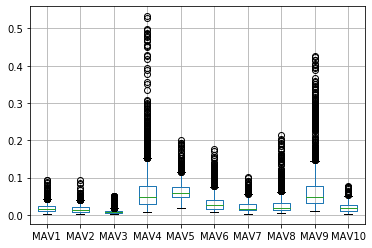

In [6]:
train_df_r1[2].iloc[:, :10].boxplot()

In [7]:
# outlier detection based on only two features: WL and MAV
# cleaning train data
train_df_r1_clean = [pd.DataFrame(columns=train_df_r1[0].columns)]*N_Subj
train_df_r2_clean = [pd.DataFrame(columns=train_df_r1[0].columns)]*N_Subj
train_df_r3_clean = [pd.DataFrame(columns=train_df_r1[0].columns)]*N_Subj

#round 1:
for s in range(0,N_Subj):
    df = train_df_r1[s]
    for i in range(1,9): #cleaning for each class of movement must be based only on the samples belonging to that class
        class_group = df.loc[df['class'] == i]
        mean = class_group.mean()
        std = class_group.std()
        x = 2.5 #threshold is considered 2.5 times of std
        for j in range(1,11):
            class_group = class_group[ np.abs(class_group['MAV'+str(j)] - mean['MAV'+str(j)]) <= x * std['MAV'+str(j)]]
            class_group = class_group[ np.abs(class_group['WL'+str(j)] - mean['WL'+str(j)]) <= x * std['WL'+str(j)]]
        train_df_r1_clean[s] = train_df_r1_clean[s].append(class_group, ignore_index=True)
    train_df_r1_clean[s]['class'] = train_df_r1_clean[s]['class'].astype(int)
    
print("Subject1:")
print("round1 train data:",train_df_r1[0].shape)
print("round1 cleaned train data",train_df_r1_clean[0].shape)

#round 2:
for s in range(0,N_Subj):
    df = train_df_r2[s]
    for i in range(1,9):
        class_group = df.loc[df['class'] == i]
        mean = class_group.mean()
        std = class_group.std()
        x = 2.5
        for j in range(1,11):
            class_group = class_group[ np.abs(class_group['MAV'+str(j)] - mean['MAV'+str(j)]) <= x * std['MAV'+str(j)] ]
            class_group = class_group[ np.abs(class_group['WL'+str(j)] - mean['WL'+str(j)]) <= x * std['WL'+str(j)]]
        train_df_r2_clean[s] = train_df_r2_clean[s].append(class_group, ignore_index=True)
    train_df_r2_clean[s]['class'] = train_df_r2_clean[s]['class'].astype(int)
    
print("round2 train data:",train_df_r2[0].shape)
print("round2 cleaned train data",train_df_r2_clean[0].shape)

#round 3:
for s in range(0,N_Subj):
    df = train_df_r3[s]
    for i in range(1,9):
        class_group = df.loc[df['class'] == i]
        mean = class_group.mean()
        std = class_group.std()
        x = 2.5
        for j in range(1,11):
            class_group = class_group[ np.abs(class_group['MAV'+str(j)] - mean['MAV'+str(j)]) <= x * std['MAV'+str(j)] ]
            class_group = class_group[ np.abs(class_group['WL'+str(j)] - mean['WL'+str(j)]) <= x * std['WL'+str(j)]]
        train_df_r3_clean[s] = train_df_r3_clean[s].append(class_group, ignore_index=True)
    train_df_r3_clean[s]['class'] = train_df_r3_clean[s]['class'].astype(int)

print("round3 train data:",train_df_r3[0].shape)
print("round3 cleaned train data",train_df_r3_clean[0].shape)

Subject1:
round1 train data: (1732, 151)
round1 cleaned train data (1570, 151)
round2 train data: (1657, 151)
round2 cleaned train data (1490, 151)
round3 train data: (1474, 151)
round3 cleaned train data (1338, 151)


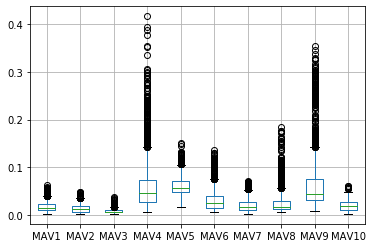

In [8]:
train_df_r1_clean[2].iloc[:, :10].boxplot()

In [ ]:
# # #Visualize Class Counts

# %matplotlib inline
# plt.style.use('ggplot')
# sns.countplot(y=train_df_r1_clean[0].iloc[:,-1] ,data=train_df_r1_clean[0].iloc[:,0:-1])
# plt.xlabel("count of each class")
# plt.ylabel("classes")
# plt.show()

In [ ]:
# Ch = list(range(0,10))+[150]
# ch_s = train_df_r1[0].iloc[:, Ch]
# plt.figure(figsize = (9,9))
# sns.heatmap(data=ch_s.corr().round(2), cmap='coolwarm', linewidths=.2, annot=True, annot_kws={"size":12})
# plt.show()

### cross correlation

In [ ]:
# to see the correlation between features, we perform this step, from this the CB featureset was chosen
# keep_ind = [4,14,24,34,44,54,64,74,84,94,104,114,124,134,144]
# droped = train_df_r1[0].iloc[:, keep_ind]
# plt.figure(figsize = (9,9))
# sns.heatmap(data=droped.corr().round(2), cmap='coolwarm', linewidths=.2, annot=True, annot_kws={"size":12})
# plt.show()

## define feature sets

In [74]:
# features: MAV, ZC, SSC, WL, HP-A, HP-M, HP-C, SE, CCI, CCII, CCIII, CCIV, RMS, IEMG, SKEW
TD = list(range(0,40)) #MAV,ZC,SSC,WL
ITD = list(range(0,70))+list(range(120,140)) #MAV, ZC, SSC, WL, HP-A, HP-M, HP-C,RMS,IEMG
CB = list(range(10,40)) + list(range(50,90)) #ZC, SSC, WL, HP_M. HP_C, ,SE, CC1 
full = list(range(0,150))

Samp_pipline = list(range(30,40))+list(range(70,90))+list(range(120,130)) #WL,SE,CCI,IEMG
HP = list(range(40,70))
good = list(range(30,40)) + list(range(50,70))
opt = list(range(30,40)) + list(range(50,70)) + list(range(80,90)) #WL, HP-M, HP-C, CCI
full_skew = list(range(0,140))


f_set = ITD # this should be changed when you want to use different feature set (and following cells must be executed again)
f_name = "full" # this will be used if you want to save the scaler model and trained model for future used

## X and Y seperation

In [76]:
# after changing feature set this cell and following ones must be executed again
#extract x and y for training and testing sets
X_train_r1 = [0]*N_Subj
X_train_r2 = [0]*N_Subj
X_train_r3 = [0]*N_Subj

y_train_r1 = [0]*N_Subj
y_train_r2 = [0]*N_Subj
y_train_r3 = [0]*N_Subj

X_test_r1 = [0]*N_Subj
X_test_r2 = [0]*N_Subj
X_test_r3 = [0]*N_Subj

y_test_r1 = [0]*N_Subj
y_test_r2 = [0]*N_Subj
y_test_r3 = [0]*N_Subj

for s in range(0,N_Subj):
    X_train_r1[s] = train_df_r1_clean[s].iloc[:,f_set]
    X_train_r2[s] = train_df_r2_clean[s].iloc[:,f_set]
    X_train_r3[s] = train_df_r3_clean[s].iloc[:,f_set]
    y_train_r1[s] = train_df_r1_clean[s].iloc[:,-1]
    y_train_r2[s] = train_df_r2_clean[s].iloc[:,-1]
    y_train_r3[s] = train_df_r3_clean[s].iloc[:,-1]
    
    X_test_r1[s] = test_df_r1[s].iloc[:,f_set]
    y_test_r1[s] = test_df_r1[s].iloc[:,-1]
    y_test_r1[s] = y_test_r1[s].astype(int)
    X_test_r2[s] = test_df_r2[s].iloc[:,f_set]
    y_test_r2[s] = test_df_r2[s].iloc[:,-1]
    y_test_r2[s] = y_test_r2[s].astype(int)
    X_test_r3[s] = test_df_r3[s].iloc[:,f_set]
    y_test_r3[s] = test_df_r3[s].iloc[:,-1]
    y_test_r3[s] = y_test_r3[s].astype(int)

print("Subject1:")
print("train cleaned:",X_train_r1[0].shape,"test",X_test_r1[0].shape)

Subject1:
train cleaned: (1570, 90) test (1155, 90)
train not cleaned: (1732, 90)


## Concat

In [77]:
# concatinating the rounds for train and test
X_train = [0]*N_Subj
y_train = [0]*N_Subj

X_test = [0]*N_Subj
y_test = [0]*N_Subj

for s in range(0,N_Subj):
    X_train[s] = pd.concat([X_train_r1[s], X_train_r2[s], X_train_r3[s]], ignore_index=True)
    y_train[s] = pd.concat([y_train_r1[s], y_train_r2[s], y_train_r3[s]], ignore_index=True)
    
    X_test[s] = pd.concat([X_test_r1[s], X_test_r2[s], X_test_r3[s]], ignore_index=True)
    y_test[s] = pd.concat([y_test_r1[s], y_test_r2[s], y_test_r3[s]], ignore_index=True)

## Scale

In [78]:
#scaler fitted on train is used on both train and test

for s in range(0,N_Subj):
    scaler=StandardScaler(copy=False).fit(X_train[s])
    scaler.transform(X_train[s])
    scaler.transform(X_test[s])
    
    # save the scaler for feature use on new unseen data if you don't want to fit the scaler from beginning again
#     pickle.dump(scaler, open(f_name+'_s'+str(s+1)+'_scaler.pkl', 'wb'))

    

## shuffle X & Y

In [79]:
# for some algorithms (e.g. perceptron) shuffling the samples is very important

from sklearn.utils import shuffle
for i in range(N_Subj):
    X_train[i] , y_train[i] = shuffle(X_train[i],y_train[i])
    X_test[i] , y_test[i] = shuffle(X_test[i],y_test[i])
    print("full test label shape : " + str(y_test[i].shape))

full test label shape : (3297,)
full test label shape : (3229,)
full test label shape : (3280,)
full test label shape : (3073,)
full test label shape : (3324,)
full test label shape : (3308,)
full test label shape : (3273,)
full test label shape : (3041,)
full test label shape : (3174,)
full test label shape : (3294,)
full test label shape : (3254,)


## PCA
#### not usefull for our purpose

In [ ]:
# #PCA fit
# from sklearn.decomposition import PCA
# # based on explained cumulative variance
# pca = PCA(n_components=0.95,svd_solver='full') 
# pca.fit(X_train)
# pca.n_components_ 
# x_pca = pca.transform(X_train)
# print("Dataset shape before PCA: ", X_train.shape)
# print("Dataset shape after PCA: ", x_pca.shape)#19

In [ ]:
# t_x_pca = pca.transform(X_test)
# print("Dataset shape before PCA: ", X_test.shape)
# print("Dataset shape after PCA: ", t_x_pca.shape)#19

In [ ]:
# #VISUALIZE The cumulative percentage of explained variance
# cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
# pd.DataFrame(cum_explained_var).transpose()

In [ ]:
# ax = sns.barplot( data=explained_var)

In [ ]:
# pca_Df = pd.DataFrame(data = x_pca
#              , columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10',
#                          'pc11', 'pc12','pc13','pc14','pc15', 'pc16','pc17','pc18','pc19'])
# pca_Df.head()

In [ ]:
# pd.DataFrame(pca.components_,index=['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10',
#                          'pc11', 'pc12','pc13','pc14'],columns=X_train.columns)

## KNN

In [14]:
knn_acc = [0]*N_Subj
for s in range(0,N_Subj):
    knn = KNeighborsClassifier(n_neighbors=40)#,weights='distance')
    knn.fit(X_train[s],y_train[s])
    y_pred = knn.predict(X_test[s])
    
    knn_acc[s]=metrics.accuracy_score(y_test[s], y_pred)
    print('subject:',s+1,"accuracy: ", knn_acc[s]*100)
sns.heatmap(confusion_matrix(y_test[10], y_pred), annot=True, fmt='d', cmap="Blues"); 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
print(np.mean(knn_acc))

subject: 1 accuracy:  96.26933575978161
subject: 2 accuracy:  93.46546918550635
subject: 3 accuracy:  84.60365853658537


KeyboardInterrupt: 

In [ ]:
## grid search for KNN
# Knn_acc = [0]*N_Subj
# for s in range(0,N_Subj):
#     classifier = KNeighborsClassifier()
#     parameters = {'n_neighbors':np.arange(50,52)}
#     gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=10, n_jobs=-1)
#     gs = gs.fit(X_train[s], y_train[s])

#     #summarize the results of your GRIDSEARCH
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
# #     means = gs.cv_results_['mean_test_score']
# #     stds = gs.cv_results_['std_test_score']
# #     params = gs.cv_results_['params']
# #     for mean, stdev, param in zip(means, stds, params):
# #         print("Mean %f Std (%f) with: %r" % (mean, stdev, param))
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     Knn_acc[s]=metrics.accuracy_score(y_test[s], y_pred)
#     print("subject:",s+1,"accuracy: ", Knn_acc[s])
# # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); 
# # plt.ylabel('True Label')
# # plt.xlabel('Predicted Label')
# print(Knn_acc)

## SVM

In [ ]:
SVM_acc = [0]*N_Subj
for s in range(0,N_Subj):
    model = SVC(kernel='linear',C=1, class_weight="balanced",gamma = 'auto')
    model.fit(X_train[s], y_train[s])
    y_pred = model.predict(X_test[s])
    
    # save the model to disk
#     filename = 'SVM_'+f_name+'_s'+str(s+1)+'.sav'
#     pickle.dump(model, open(filename, 'wb'))
    
    SVM_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
    print("subject",s+1,'accuracy:',SVM_acc[s]*100)
sns.heatmap(confusion_matrix(y_test[10], y_pred), annot=True, fmt='d', cmap="Blues", cbar=False);
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
print(np.mean(SVM_acc))

In [ ]:
# # grid search for SVM
# SVC_acc=[0]*N_Subj
# classifier = SVC()
# parameters = {"kernel":['linear'], "C":[1,10,100,1000],"gamma":[1e-4]} 
# for s in range(0,N_Subj):
#     gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#     gs = gs.fit(X_train[s], y_train[s])
#     #summarize the results of your GRIDSEARCH
#     print('***GRIDSEARCH RESULTS***')
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     SVC_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
#     print("subject",s+1,"accuracy",SVC_acc[s])
# print(SVC_acc[s])

In [ ]:
# print(classification_report(y_test[s], y_pred))

## naive bayes

In [ ]:
NB_acc=[0]*N_Subj
for s in range(0,N_Subj): 
    model = GaussianNB(var_smoothing=0.1)

    model.fit(X_train[s], y_train[s])
    y_pred=model.predict(X_test[s])
    NB_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
    print("subject:",s+1,"accuracy: ", NB_acc[s]*100)
sns.heatmap(confusion_matrix(y_test[10], y_pred), annot=True, fmt='d', cmap="Blues", cbar=False);
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [ ]:
# # grid search for NB
# NB = GaussianNB()
# l1=[0.125, 0.125,0.125,0.125,0.125, 0.125,0.125,0.125]
# parameters = {'priors':[l1,None]}

# NB_acc=[0]*N_Subj
# for s in range(0,N_Subj): 
#     gs = GridSearchCV(NB, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#     gs = gs.fit(X_train[s], y_train[s])

#     print('***GRIDSEARCH RESULTS***')
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     NB_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
#     print("subject",s+1,"accuracy: ", NB_acc[s])
# print(NB_acc)

## LDA

In [ ]:
LDA_acc=[0]*N_Subj

LDA = LinearDiscriminantAnalysis(solver='svd')
for s in range(0,N_Subj):
    LDA.fit(X_train[s], y_train[s])
    
#     # save the model to disk
#     filename = 'LDA_'+f_name+'_s'+str(s+1)+'.sav'
#     pickle.dump(LDA, open(filename, 'wb'))
    
    y_pred = LDA.predict(X_test[s])
    LDA_acc[s] = metrics.accuracy_score(y_test[s], y_pred)

    print("subject",s+1,"accuracy: ", LDA_acc[s]*100)
sns.heatmap(confusion_matrix(y_test[10], y_pred), annot=True, fmt='d', cmap="Reds");
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
print(np.mean(LDA_acc))

In [ ]:
# # grid search for LDA
# LDA = LinearDiscriminantAnalysis()
# parameters = {'solver':['svd','lsqr']}
# LDA_acc=[0]*N_Subj

# for s in range(0,N_Subj):
#     gs = GridSearchCV(LDA, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#     gs = gs.fit(X_train[s], y_train[s])

#     print('***GRIDSEARCH RESULTS***')
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))

#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     LDA_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
#     print("subject",s+1,"accuracy: ", LDA_acc[s])
# print(LDA_acc)

## MLP

In [82]:
MLP_acc = []

av_for = 20 # MLP is stochastic so it should be averaged over some number of repetitions

MLP=MLPClassifier(hidden_layer_sizes=(300), #warm_start=True,
              activation='tanh', alpha=0.0001, n_iter_no_change=20, solver='sgd',tol=0.0001,
              max_iter=1000, verbose=False) 

for s in range(0,N_Subj):
    acc_list =[]
    for i in range(av_for):
        MLP.fit(X_train[s], y_train[s])
        y_pred = MLP.predict(X_test[s])
        
        acc_list.append(metrics.accuracy_score(y_test[s], y_pred)) 
#     print(acc_list)
    aver=np.mean(acc_list)
    MLP_acc.append(acc_list)
    print("************subject:",s+1,"average accuracy:***********", aver*100)
print(MLP_acc)
# print(np.mean(MLP_acc))

************subject: 1 average accuracy:*********** 95.32302092811646
************subject: 2 average accuracy:*********** 93.52895633323008
************subject: 3 average accuracy:*********** 87.96951219512195
************subject: 4 average accuracy:*********** 89.54604620891638
************subject: 5 average accuracy:*********** 90.17599277978337
************subject: 6 average accuracy:*********** 91.24395405078596
************subject: 7 average accuracy:*********** 85.92117323556371
************subject: 8 average accuracy:*********** 93.83755343636962
************subject: 9 average accuracy:*********** 91.99590422180212
************subject: 10 average accuracy:*********** 95.3217972070431
************subject: 11 average accuracy:*********** 91.100184388445
[[0.9523809523809523, 0.9526842584167425, 0.9520776463451622, 0.9526842584167425, 0.9523809523809523, 0.9599636032757052, 0.9511677282377919, 0.951471034273582, 0.9526842584167425, 0.9557173187746436, 0.951471034273582, 0.951471034

In [92]:
for i in MLP_acc[9]:
    print(round(i*100,2))
np.mean(MLP_acc[0])

95.11
95.6
95.29
95.63
95.23
94.51
95.81
95.32
95.17
95.29
94.81
95.23
95.45
96.24
94.72
95.26
95.36
95.32
95.42
95.66


0.9532302092811646

In [ ]:
sns.heatmap(confusion_matrix(y_test[10], y_pred), annot=True, fmt='d', cmap="Reds");
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [ ]:
# # grid search for SVM
# classifier = MLPClassifier()
# parameters = {"hidden_layer_sizes":[(50,20)],  "max_iter": [1000], "alpha": [0.001],"activation":['relu'],'solver':['adam']}
# # activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
# acc_list=[0]*5
# MLP_acc = [0]*N_Subj

# for s in range(0,N_Subj):
#     for i in range(5):
#         gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#         gs = gs.fit(X_train[s], y_train[s])

#         print('***GRIDSEARCH RESULTS***')
#         print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
#         means = gs.cv_results_['mean_test_score']
#         stds = gs.cv_results_['std_test_score']
#         params = gs.cv_results_['params']

#         for mean, stdev, param in zip(means, stds, params):
#             print("%f (%f) with: %r" % (mean, stdev, param))

#         best_model = gs.best_estimator_
#         y_pred = best_model.predict(X_test[s])
#         acc_list[i] = metrics.accuracy_score(y_test[s], y_pred)
#         print(acc_list[i])
#     aver=np.mean(acc_list)
#     MLP_acc[s]=aver
#     print('********************************************')
#     print("subject:",s+1)
#     print("average accuracy:", aver)

# print("MLP accuracy: ", MLP_acc)
